# Galactic Problem Set 3
### Peter Chi

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Problem 1

\begin{align}
\frac{F(t)}{F_0}&=1-\frac{A_E(t)}{\pi R_*^2} \\
A_E(t)&\approx R_p^2\text{cos}^{-1}\left[\frac{x}{R_p}\right] - R_px\sqrt{1-\frac{x^2}{R_p^2}}
\end{align}
with $x=d-R_*$. Also take $F_0=1$ and 
$$ d = a\sqrt{\text{sin}^2\omega t + \text{cos}i~\text{cos}^2\omega t}$$

In [2]:
import numpy as np
    
def transit(rp,sma,inc,tstep=.001):
    """
    rp = planet radius in R_sol
    sma = semi major axis in AU
    inc = inclination in degrees
    
    Assume units of R_sol = 1
    R_earth = .00915, R_jupiter = .10049
    """
    sma*=215.
    inc*=np.pi/180.
    
    time=np.arange(-.0625*np.pi,.0625*np.pi,tstep)
    dis=sma*np.sqrt(np.sin(time)**2+np.cos(inc)*np.cos(time)**2)
    xis=dis-1.
    flux=np.ones(len(dis))
    for i in range(len(dis)):
        area=0
        if xis[i] <= rp:
            if xis[i] < -rp:
                area = np.pi*rp**2
            else:
                area=(rp**2)*np.arccos(xis[i]/rp) - rp*xis[i]*np.sqrt(1.-(xis[i]/rp)**2)
        flux[i]=1.-area/np.pi
        
    plot(time,flux)
    pyplot.xlabel('orbital phase')
    pyplot.ylabel('flux')
    return 


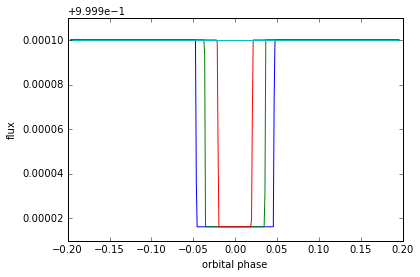

In [3]:
#Earth radius, .1 AU
#don't know how to fix flux units, but eclipse depth = .99992
transit(.00915,.1,90)
transit(.00915,.1,89.95)
transit(.00915,.1,89.9)
transit(.00915,.1,89.8)

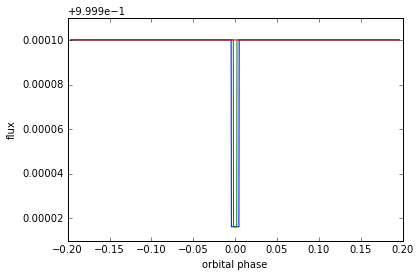

In [4]:
#Earth radius, 1 AU
transit(.00915,1,90,.0001)
transit(.00915,1,89.999,.0001)
transit(.00915,1,89.998,.0001)

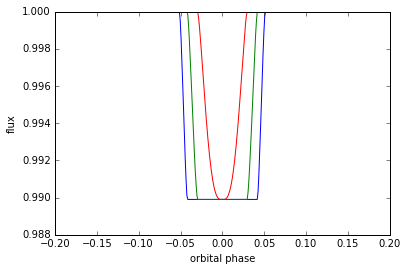

In [5]:
#Jupiter radius, .1 AU
transit(.10049,.1,90)
transit(.10049,.1,89.95)
transit(.10049,.1,89.9)
transit(.10049,.1,89.8)

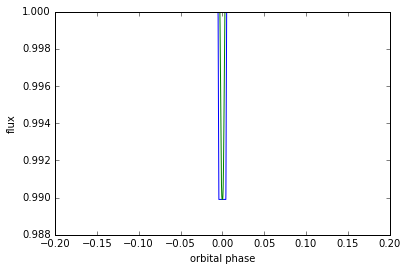

In [6]:
#Jupiter radius, 1 AU
transit(.10049,1,90,.0001)
transit(.10049,1,89.999,.0001)
transit(.10049,1,89.998,.0001)

### Problem 2

Conservation of angular momentum means orbit must be in a plane, ignore the z coordinate...

Need to solve $$ \frac{d^2u}{d\theta^2}+u=\frac{1}{L^2u^2}\frac{d\Phi}{dr}\left(\frac{1}{u}\right)$$
or \begin{cases}\frac{dv}{d\theta}=\frac{1}{L^2u^2}\frac{d\Phi}{dr}\left(\frac{1}{u}\right) -u \\ \frac{du}{d\theta}=v\end{cases}

For a NFW potential, 
\begin{align}\rho_{NFW}(r)&=\frac{\rho_0}{(r/r_0)(1+r/r_0)^2} \\
\frac{d\Phi_{NFW}}{dr}(r)&=G\frac{M(r)}{r^2} \\ 
&=4\pi G\rho_0r_0\frac{1}{x^2}\left[\text{ln}(1+x)-\frac{x}{1+x}\right], ~x=r/r_0
\end{align}

For Burkest, 
\begin{align}\rho_{bur}(r)&=\frac{\rho_b}{(1+r/r_b)(1+r^2/r_b^2)} \\
\frac{d\Phi_{bur}}{dr}(r)&= \pi G\rho_b r_b\frac{1}{x^2}\left[2\text{ln}(1+x)-\text{ln}(1+x^2)+2\text{tan}^{-1}x\right], ~x=r/r_b
\end{align}



In [7]:
from scipy.integrate import odeint

def orbitint(x0,y0,ang=1.,tsteps=100):
    """
    Integrate orbits via odeint routine (wrapper for LSODA)
    Choose units s.t. all the constants and scale quantities = 1, because why not...
    Inputs: initial conditions r0, rdot0, angular momentum
    Outputs: tstep*100 len array of [x,y] coordinates
    """
    
    def nfw(x):
        temp=np.log(1.+x)-(x/(1.+x))
        return temp/x**2
    
    def bur(x):
        temp=2.*np.log(1.+x)-np.log(1.+x**2)+2.*np.arctan(x)
        return temp*.25/x**2
    
    def derivn(y,t):
        yuck=(nfw(1./y[0])/((ang**2)*(y[0]**2)))-y[0]
        return [y[1],\
                yuck]
    
    def derivb(y,t):
        yuck=(bur(1./y[0])/((ang**2)*(y[0]**2)))-y[0]
        return [y[1],\
                yuck]
                
    thetas=np.linspace(0,tsteps,tsteps*100)
    
    orbitn=odeint(derivn,[x0,y0],thetas)
    radn=1./orbitn[:,0]
    xn=radn*np.cos(thetas)
    yn=radn*np.sin(thetas)
    
    orbitb=odeint(derivb,[x0,y0],thetas)
    radb=1./orbitb[:,0]
    xb=radb*np.cos(thetas)
    yb=radb*np.sin(thetas)
    
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    axs[0].plot(xn,yn) ; axs[0].set_title('NFW profile')
    axs[1].plot(xb,yb) ; axs[1].set_title('Burkest profile')
    return 
    

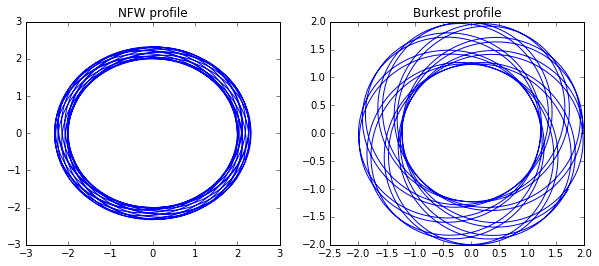

In [8]:
orbitint(.5,.01,1)

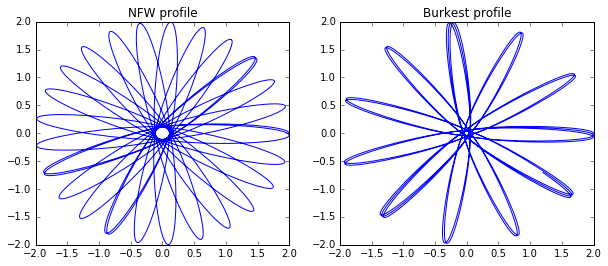

In [9]:
orbitint(.5,.01,.1)

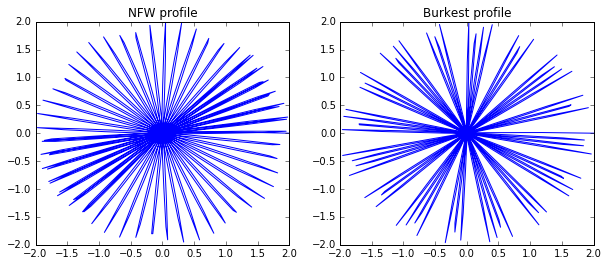

In [10]:
orbitint(.5,.01,.01,200)

The orbits are rosettes. With decreasing angular momentum, the orbits become more eccentric